* Rahil Sayyad
* Rahilsayyad389@gmail.com

## import used libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read Dataset

In [2]:
df=pd.read_csv("bank-full.csv")

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
# find a null values
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [5]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [6]:
#describe data in detrail
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
# using label encoding convert string formated data into numeric
l=["job","marital","education","default","housing","loan","contact","month","poutcome",]
for i in l:
    from sklearn.preprocessing import  LabelEncoder
    le= LabelEncoder()
    df[i]=le.fit_transform(df[i])
    df[i]

In [8]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,no
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,no
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,no
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,no
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,yes
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,yes
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,yes
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,no


In [9]:
df["Target"]=df["Target"].map({"no":0,"yes":1})

## separate a X (Independant) and y (Dependant) variable

In [10]:
x=df.drop("Target",axis=1)

In [11]:
y=df["Target"]

In [12]:
y.head(4)

0    0
1    0
2    0
3    0
Name: Target, dtype: int64

## Split the data in train and test side for prediction

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=21)

In [14]:
x_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
4603,32,1,1,1,0,113,1,1,2,20,8,235,2,-1,0,3
27637,58,2,1,1,0,0,0,1,0,21,9,56,2,-1,0,3
6897,55,1,1,1,0,284,1,1,2,28,8,157,3,-1,0,3
31742,44,10,1,1,0,728,1,0,0,7,0,185,1,328,11,0
8378,32,7,1,1,1,-790,1,0,2,3,6,159,1,-1,0,3


In [15]:
y_test

122      0
37697    0
2909     0
33806    0
35563    0
        ..
26052    0
7549     0
33562    0
33879    1
24869    0
Name: Target, Length: 13564, dtype: int64

In [16]:
df["Target"].value_counts()

0    39922
1     5289
Name: Target, dtype: int64

## fitting the logestic regressor model

In [17]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(random_state=0)

## fit the model on trainig data

In [18]:
LR.fit(x_train,y_train)

C:\Users\Rahil\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

## predict the output using test dataset

In [19]:
y_pred=LR.predict(x_test)

In [20]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
y_test

122      0
37697    0
2909     0
33806    0
35563    0
        ..
26052    0
7549     0
33562    0
33879    1
24869    0
Name: Target, Length: 13564, dtype: int64

In [22]:
## check accuracy score and confusion metrics

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

0.8929519315836036


array([[11797,   211],
       [ 1241,   315]], dtype=int64)

In [24]:
import seaborn as sns

(array([27914.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  3733.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

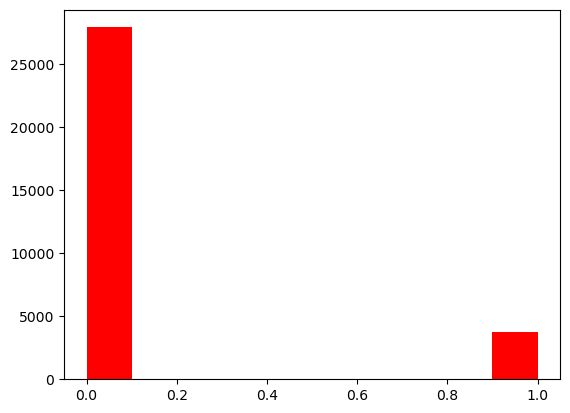

In [25]:
plt.hist(y_train,color='r')